In [1]:
import os
mat_file_path = 'emnist-letters.mat'
if not os.path.exists(mat_file_path):
    print("Il file non esiste:", mat_file_path)
else:
    print("Il file esiste, procedo con il caricamento.")

Il file esiste, procedo con il caricamento.


In [ ]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install PIL

In [ ]:

import scipy.io
import numpy as np

#variabile con il percorso del dataset
mat_file_path = 'emnist-letters.mat' 


def load_emnist_letters(mat_file_path):
    # Carica il file .mat
    mat = scipy.io.loadmat(mat_file_path)

    # Estrazione dei dati
    dataset = mat['dataset']

    train_images = dataset['train'][0,0]['images'][0,0]
    train_labels = dataset['train'][0,0]['labels'][0,0]
    test_images = dataset['test'][0,0]['images'][0,0]
    test_labels = dataset['test'][0,0]['labels'][0,0]

    # Reshape delle immagini del dataset
    train_images = train_images.reshape((-1, 28, 28))
    test_images = test_images.reshape((-1, 28, 28))

    # Alcuni file EMNIST richiedono una trasposizione per visualizzare correttamente le immagini
    train_images = np.transpose(train_images, (0, 2, 1))
    test_images = np.transpose(test_images, (0, 2, 1))

    return train_images, train_labels, test_images, test_labels


train_images, train_labels, test_images, test_labels = load_emnist_letters(mat_file_path)

# Aggiunta di una dimensione per il canale (necessario per TensorFlow)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

Examples from the training set:


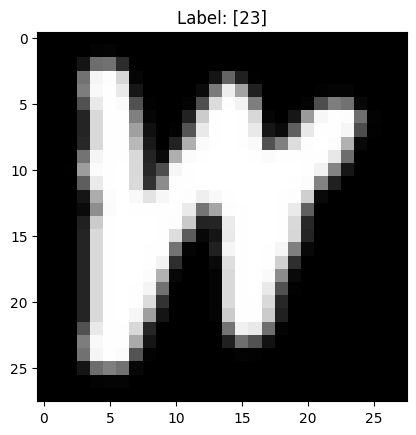

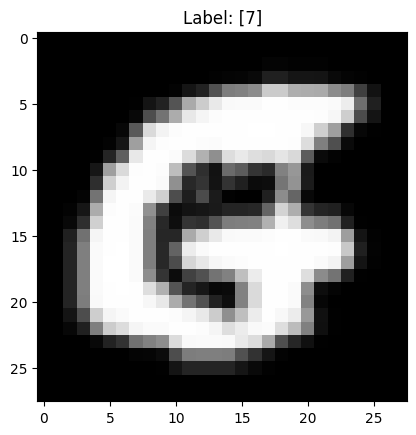

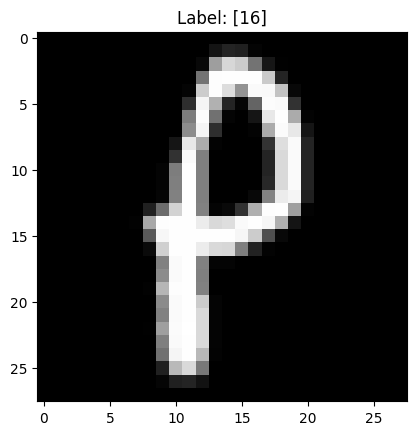

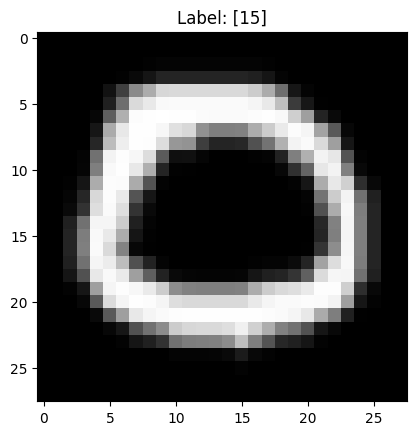

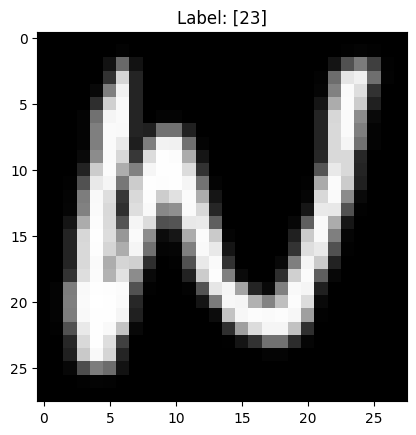


Examples from the test set:


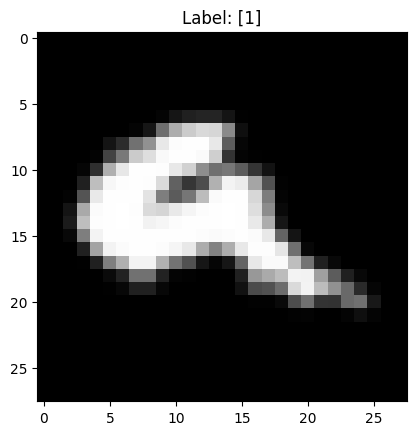

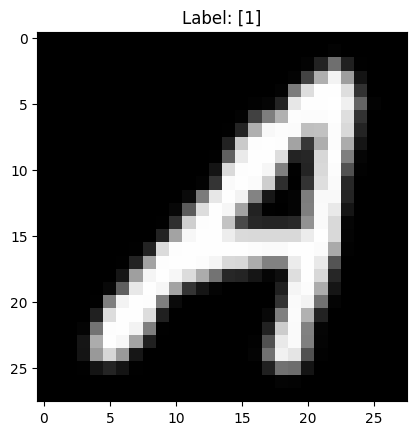

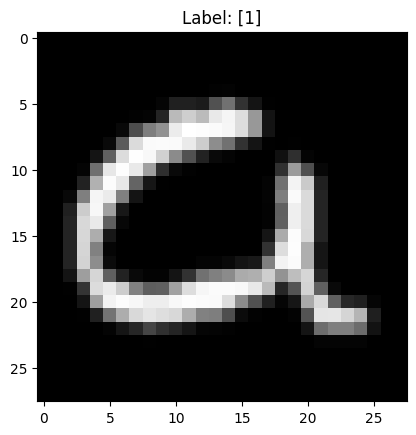

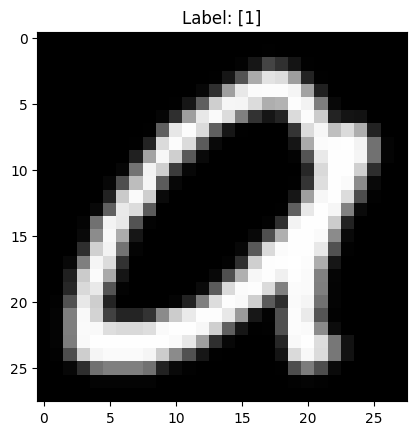

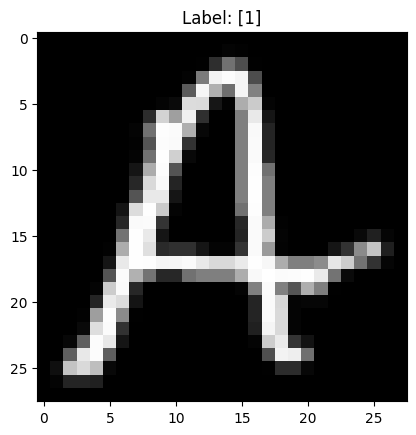

In [ ]:
# Per controllare che i dati siano stati caricati correttamente
# possiamo visualizzare alcune immagini

import matplotlib.pyplot as plt

print("Examples from the training set:")
for i in range(5):  # Print the first 5 images
    plt.imshow(train_images[i,:,:,0], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.show()

print("\nExamples from the test set:")
for i in range(5):  # Print the first 5 images
    plt.imshow(test_images[i,:,:,0], cmap='gray')
    plt.title(f"Label: {test_labels[i]}")
    plt.show()


In [ ]:
# Controllare mapping tra classe e lettera effettiva
import string

unique_labels = np.unique(train_labels)

mapping = {}
for i, label in enumerate(unique_labels):
    mapping[label] = string.ascii_uppercase[i]

print("Classes with corresponding letters:")
for label, letter in mapping.items():
    print(f"Label {label}: Letter {letter}")


Classes with corresponding letters:
Label 1: Letter A
Label 2: Letter B
Label 3: Letter C
Label 4: Letter D
Label 5: Letter E
Label 6: Letter F
Label 7: Letter G
Label 8: Letter H
Label 9: Letter I
Label 10: Letter J
Label 11: Letter K
Label 12: Letter L
Label 13: Letter M
Label 14: Letter N
Label 15: Letter O
Label 16: Letter P
Label 17: Letter Q
Label 18: Letter R
Label 19: Letter S
Label 20: Letter T
Label 21: Letter U
Label 22: Letter V
Label 23: Letter W
Label 24: Letter X
Label 25: Letter Y
Label 26: Letter Z


In [6]:
print("Dimensione train_images:", train_images.shape)

Dimensione train_images: (124800, 28, 28, 1)


In [ ]:
# Data augmentation
# Aumentiamo al dimensione del dataset con tecniche di data augmentation
# In questo caso applichiamo rotazioni, traslazioni e zoom alle immagini di addestramento
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(train_images)

Training del modello

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Normalizzazione delle immagini (da 0-255 a 0-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Converti le etichette in formato int32 e sottrai 1 per avere etichette da 0 a 25
train_labels = train_labels.astype('int32') - 1
test_labels = test_labels.astype('int32') - 1

print("Dimensioni train_images:", train_images.shape)
print("Dimensioni train_labels:", train_labels.shape)
print("Dimensioni test_images:", test_images.shape)
print("Dimensioni test_labels:", test_labels.shape)

# Definizione del modello CNN (Rete neurale convoluzionale)
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),  # Input layer con immagini 28x28 in scala di grigi
    layers.Conv2D(32, (3,3), activation='relu'), # Prima convoluzione
    layers.MaxPooling2D((2,2)), # Max pooling, riduzione della dimensione
    layers.Conv2D(64, (3,3), activation='relu'), # Seconda convoluzione
    layers.MaxPooling2D((2,2)),# Max pooling, ulteriore riduzione della dimensione
    layers.Conv2D(128, (3,3), activation='relu'),# Terza convoluzione
    layers.Flatten(),# Appiattimento dei dati per il fully connected layer
    layers.Dense(128, activation='relu'),# Fully connected layer
    layers.Dense(26, activation='softmax')  # 26 classi, una per lettera
])

# Compilazione del modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Visualizza il sommario del modello
model.summary()

# Addestramento del modello



Dimensioni train_images: (124800, 28, 28, 1)
Dimensioni train_labels: (124800, 1)
Dimensioni test_images: (20800, 28, 28, 1)
Dimensioni test_labels: (20800, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,610 (951.60 KB)

 Trainable params: 243,610 (951.60 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
          epochs=15,
          validation_data=(test_images, test_labels))

# Valutazione del modello sul test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nAccuratezza sul test set:", test_acc)

C:\Users\picch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - accuracy: 0.6833 - loss: 1.0504 - val_accuracy: 0.9198 - val_loss: 0.2452
Epoch 2/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8963 - loss: 0.3170 - val_accuracy: 0.9257 - val_loss: 0.2258
Epoch 3/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.9140 - loss: 0.2592 - val_accuracy: 0.9329 - val_loss: 0.2020
Epoch 4/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9196 - loss: 0.2357 - val_accuracy: 0.9373 - val_loss: 0.1911
Epoch 5/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9270 - loss: 0.2151 - val_accuracy: 0.9261 - val_loss: 0.2251
Epoch 6/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.9296 - loss: 0.2037 - val_accuracy: 0.9400 - val_loss: 0.1810
Epoch 7/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9330 - loss: 0.1929 - val_accuracy: 0.9428 - val_loss: 0.1750
Epoch 8/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.9349 -

In [ ]:
# Salvataggio del modello per poi utilizzarlo nella classe main
model.save("letter_recognition_model.h5")

In [13]:
import matplotlib.pyplot as plt

Test vari del modello

In [14]:
#genera un numero casuale tra 0 e 124799

import random

random_number = random.randint(0, 20800)
random_number


5822

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
La classe predetta 8 corrisponde alla lettera: i
La classe reale 8 corrisponde alla lettera: i


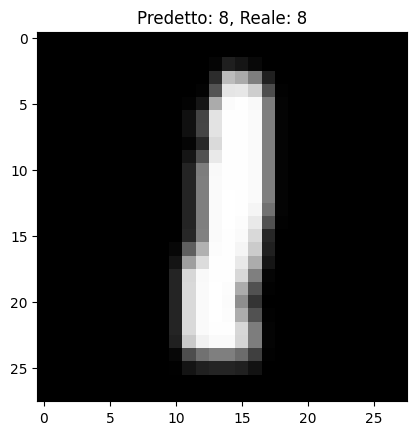

In [ ]:
import random
#test del modello con un'immagine casuale dal test set
random_number = random.randint(0, 20800)

# 
predictions = model.predict(test_images[[random_number]]) #
plt.imshow(test_images[random_number].reshape(28,28), cmap="gray")
plt.title(f"Predetto: {np.argmax(predictions[0])}, Reale: {test_labels[random_number][0]}")

predicted_letter = chr(np.argmax(predictions[0]) + ord('a'))  # Converte la classe in lettera
real_letter = chr(test_labels[random_number][0] + ord('a'))  # Converte la classe in lettera
print(f"La classe predetta {np.argmax(predictions[0])} corrisponde alla lettera: {predicted_letter}")
print(f"La classe reale {test_labels[random_number][0]} corrisponde alla lettera: {real_letter}")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La lettera predetta è: 1
La classe 1 corrisponde alla lettera: b


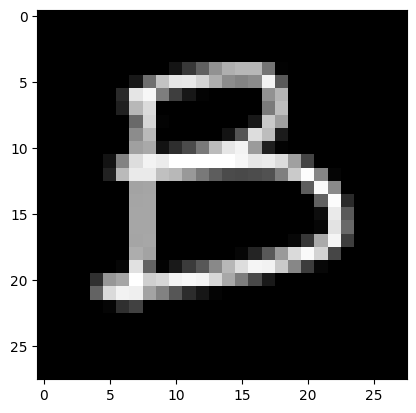

In [ ]:
# test modello con immagine che rappresenta una B

from PIL import Image
import numpy as np

# Carica l'immagine
img = Image.open("costum-test/B-1.png").convert("L")  # Converti in scala di grigi

# Ridimensiona l'immagine a 28x28 pixel
img = img.resize((28, 28))

# Converti l'immagine in un array NumPy
img_array = np.array(img)

# Normalizza i pixel (da 0-255 a 0-1)
img_array = img_array / 255.0
img_array = 1 - img_array
plt.imshow(img_array, cmap="gray")
# Ridimensiona per la CNN (aggiunta del canale)
img_array = img_array.reshape(1, 28, 28, 1)
#plt.imshow(img_array, cmap="gray")
# Carica il modello
#model = tf.keras.models.load_model("letter_recognition_model.h5")

# Fai la previsione
prediction = model.predict(img_array)

# Stampa la previsione
predicted_digit = np.argmax(prediction)
print(f"La lettera predetta è: {predicted_digit}")
predicted_letter = chr(predicted_digit + ord('a') )  # Converte la classe in lettera

print(f"La classe {predicted_digit} corrisponde alla lettera: {predicted_letter}")
